In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import dtypes
import siggen
import pelengator


import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed
from IPython.core.display import HTML
from IPython.display import display, clear_output
from plotly.widgets import GraphWidget
from traitlets import link


#input parameters

a = dtypes.PyAntenna()
a.load("/home/dima/.landing/AFS4.ini")
f0 = 180e6
N = 2 ** 16
fs = f0 * N / (N/2 -2);
f_res = fs / N
df = f_res
lh_size = (30, 60)

direction = np.array([np.radians(0), np.radians(0)])

<IPython.core.display.Javascript object>

In [25]:
%%latex
Алгоритм формирования диаграммы направленности
\begin{align}
F(\alpha,\beta) = \sum_{i = 0}^{N} exp(j \cdot dr^{T}  \cdot (k - k_{пр})),
\end{align}
где
\begin{align}
dr =
\begin{pmatrix}
  x_i \\
  y_i \\
  z_i  \\
\end{pmatrix} -
\end{align}
координаты антенного элемента относительно условного фазового центра,
\begin{align}
k = k_0
\begin{pmatrix}
  cos(\beta) \cdot cos(\alpha) \\
  cos(\beta) \cdot sin(\alpha) \\
  sin(\beta)  \\
\end{pmatrix} -
\end{align}
волновой вектор, 
\begin{align}
k_{пр} = k_0
\begin{pmatrix}
  cos(\beta_{пр}) \cdot cos(\alpha_{пр}) \\
  cos(\beta_{пр}) \cdot sin(\alpha_{пр}) \\
  sin(\beta_{пр})  \\
\end{pmatrix} -
\end{align}
примаемый волновой вектр

\begin{align}
k_0 -
\end{align}
волновое число,

\begin{align}
(\alpha_{пр}, \beta_{пр}) - 
\end{align}
координаты направления диаграммы направленности





<IPython.core.display.Latex object>

<IPython.core.display.Javascript object>


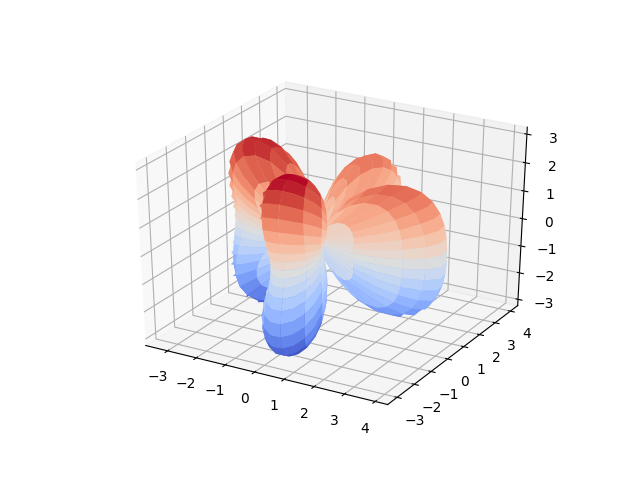

FloatSlider(value=0.0, description='Azimuth', max=360.0)

FloatSlider(value=0.0, description='Elevation', max=90.0, min=-90.0)

In [3]:
#Visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def draw_arp(direction):
    lh, alpha_grid, betta_grid = pelengator.arp(a, f0, lh_size, direction)
    x = np.abs(lh) * np.cos(betta_grid) *np.cos(alpha_grid)
    y = np.abs(lh) * np.cos(betta_grid) * np.sin(alpha_grid)
    z = np.abs(lh) * np.sin(betta_grid)
    ax.cla()
    ax.plot_surface(x, y, z, cmap=cm.coolwarm)
    fig.canvas.draw()
    
draw_arp(direction)

# let's define our listener functions that will respond to changes in the sliders
def on_value_change_azimuth(change):
    direction[0] = np.radians(change['new'])
    draw_arp(direction)

    

def on_value_change_elevation(change):
    direction[1] = np.radians(change['new'])
    draw_arp(direction)



# define the sliders
azimuth_slider = widgets.FloatSlider(min=0, max=360, value = 0, description="Azimuth")
elevation_slider = widgets.FloatSlider(min=-90, max=90, value = 0, description="Elevation")  

# put listeners on slider activity
azimuth_slider.observe(on_value_change_azimuth, names='value')
elevation_slider.observe(on_value_change_elevation, names='value')

# # display our app
display(azimuth_slider)
display(elevation_slider)
# # display(graph)